# Rapido Data Analysis

### 1. Background

Rapido, a leading mobility services provider, operates in a highly competitive market. With a focus on customer satisfaction and operational excellence, the company aims to:

- Optimize resource allocation.
- Increase revenue generation.
- Reduce ride cancellations.

Using a dataset of 50,000 rides in Bangalore, This project provides insights into service usage, customer behavior, and revenue trends, offering data-driven recommendations for growth and operational efficiency.

### 2. Project Objective

The objective of this analysis is to:

- **Understand Service Trends**: Analyze usage patterns and payment preferences to uncover key insights.
- **Optimize Revenue**: Evaluate revenue distribution and trends to identify growth opportunities.
- **Enhance Efficiency**: Examine ride statuses to address cancellation issues.
- **Inform Strategy**: Detect demand patterns to refine pricing and promotional strategies.

### 3. Setup and Load Data

#### 3.1 Install and Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### 3.2 load Dataset

In [2]:
df = pd.read_csv('rides_data.csv')
df.head(10)

,services,date,time,ride_status,source,destination,duration,ride_id,distance,ride_charge,misc_charge,total_fare,payment_method
0,cab economy,2024-07-15,08:30:40.542646,completed,Balagere Harbor,Harohalli Nagar,39,RD3161218751875354,27.21,764.83,31.51,796.34,Amazon Pay
1,auto,2024-07-05,23:36:51.542646,completed,Basavanagudi 3rd Block,Bikasipura 1st Stage,89,RD8171514284594096,34.03,314.83,49.52,364.35,Paytm
2,auto,2024-07-23,11:05:37.542646,cancelled,Babusapalya Cove,Kothaguda Terrace,25,RD9376481122237926,20.24,NaN,NaN,NaN,NaN
3,cab economy,2024-06-24,08:45:10.542646,completed,Mahadevapura Mews,Kanakapura Arc,89,RD3676889143182765,31.17,484.73,15.84,500.57,QR scan
4,cab economy,2024-07-15,00:26:44.542646,completed,Ganganagar Cove,Basaveshwaranagar Colony,95,RD6639410275948084,27.21,663.50,14.13,677.63,Amazon Pay
5,auto,2024-07-02,01:28:29.542646,completed,HSR Layout Area,JP Nagar Viewpoint,18,RD5922205486441934,33.69,456.73,25.19,481.92,QR scan
6,cab economy,2024-07-23,20:55:28.542646,completed,Arekere Heights,Dooravani Nagar Pointe,85,RD9557099396888459,20.44,836.39,14.95,851.34,GPay
7,parcel,2024-07-18,13:38:33.542646,completed,Electronic City Village,Ganganagar Station,89,RD9473873953525644,35.31,724.76,31.34,756.10,QR scan
8,parcel,2024-08-08,07:59:53.542646,completed,Mysore Road Lane,Billekahalli 6th Block,72,RD1285566012167240,45.99,641.55,21.48,663.03,Amazon Pay
9,bike lite,2024-07-10,12:30:07.542646,completed,Kundalahalli Alley,RT Nagar 5th Block,94,RD7238628094142076,44.43,571.50,47.63,619.13,QR scan


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   services        50000 non-null  object 
 1   date            50000 non-null  object 
 2   time            50000 non-null  object 
 3   ride_status     50000 non-null  object 
 4   source          50000 non-null  object 
 5   destination     50000 non-null  object 
 6   duration        50000 non-null  int64  
 7   ride_id         50000 non-null  object 
 8   distance        50000 non-null  float64
 9   ride_charge     44964 non-null  float64
 10  misc_charge     44964 non-null  float64
 11  total_fare      44964 non-null  float64
 12  payment_method  44964 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 5.0+ MB


### 4. Data Cleaning and Preprocessing

#### 4.1 Handling missing values

In [4]:
df['ride_charge'].fillna(0, inplace=True)
df['misc_charge'].fillna(0, inplace=True)
df['total_fare'].fillna(0, inplace=True)

#### 4.2 Feature Engineering

In [5]:
df['date'] = pd.to_datetime(df['date'])
df['weekday'] = df['date'].dt.day_name()
df['hour'] = pd.to_datetime(df['time']).dt.hour
df['fare_per_km'] = df['total_fare'] / df['distance']
df['fare_per_km'].replace([np.inf, -np.inf], np.nan, inplace=True)
df['is_cancelled'] = (df['ride_status'] == 'cancelled').astype(int)

### 5. Exploratory Data Analysis

#### 5.1 Service Usage Distribution

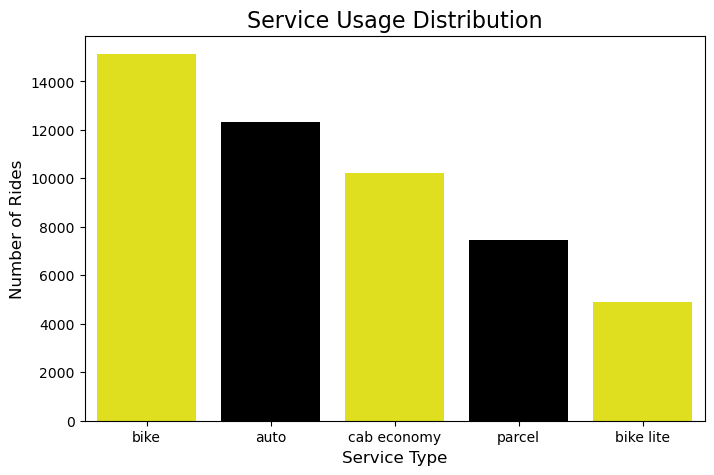

In [6]:
plt.figure(figsize=(8, 5))
service_counts = df['services'].value_counts()
sns.barplot(x=service_counts.index, y=service_counts.values, palette=["yellow", "black"])
plt.title("Service Usage Distribution", fontsize=16, color='black')
plt.xlabel("Service Type", fontsize=12, color='black')
plt.ylabel("Number of Rides", fontsize=12, color='black')
plt.show()


#### 5.2 Ride status Analysis

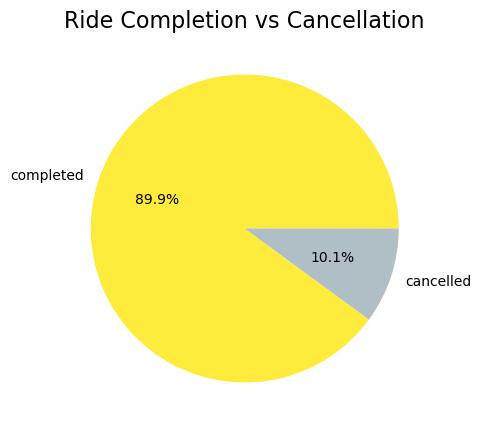

In [7]:
plt.figure(figsize=(6, 5))
status_counts = df['ride_status'].value_counts()
plt.pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%', colors=['#FFEB3B', '#B0BEC5'])
plt.title("Ride Completion vs Cancellation", fontsize=16, color='black')
plt.show()

#### 5.3 Revenue Insights by Service

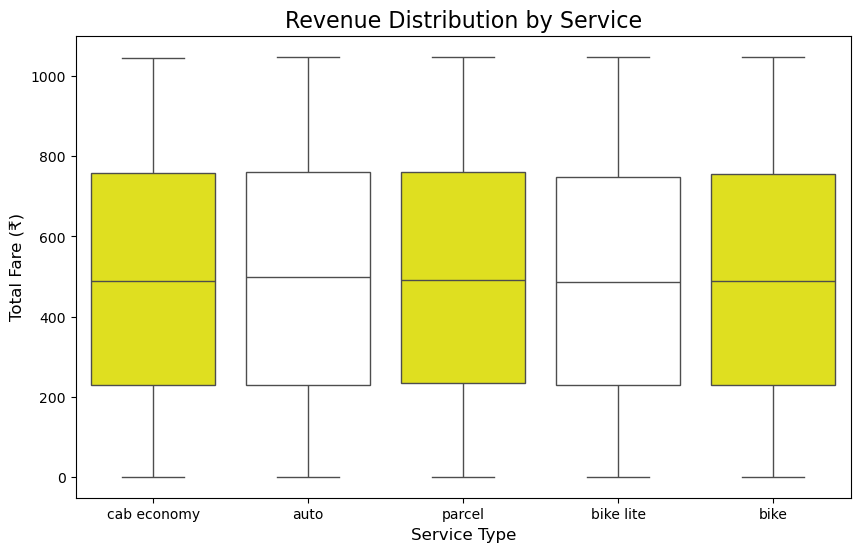

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='services', y='total_fare', data=df, palette=["yellow", "white"]) 
plt.title("Revenue Distribution by Service", fontsize=16, color='black')
plt.xlabel("Service Type", fontsize=12, color='black')
plt.ylabel("Total Fare (₹)", fontsize=12, color='black')
plt.show()

#### 5.4 Revenue Trend Over Time

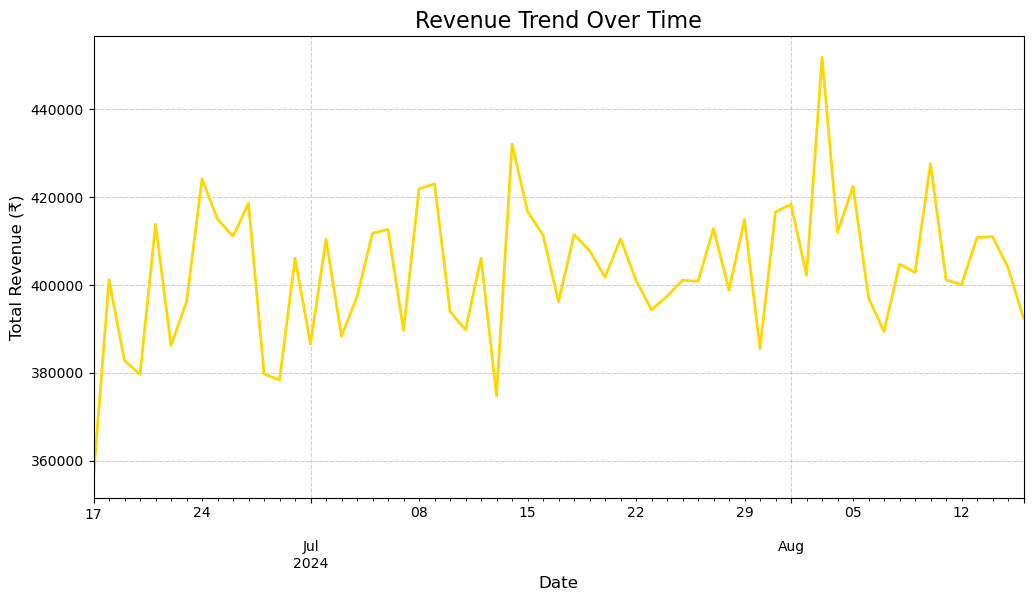

In [9]:
# Aggregating daily revenue
daily_revenue = df.groupby('date')['total_fare'].sum()

# Line chart for daily revenue trend
plt.figure(figsize=(12, 6))
daily_revenue.plot(color='gold', linewidth=2)
plt.title("Revenue Trend Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Revenue (₹)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

#### 5.5 Payment Method Distribution

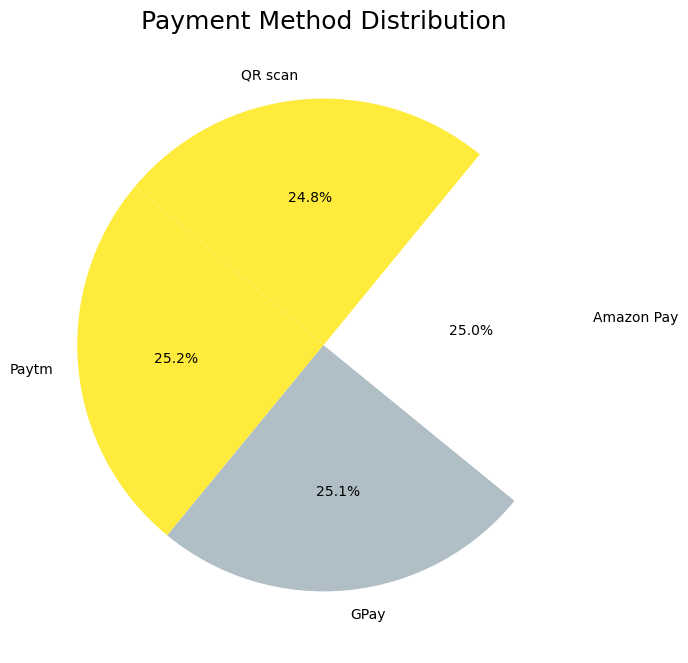

In [10]:
payment_counts = df['payment_method'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=140, colors=['#FFEB3B', '#B0BEC5', '#FFFFFF'])
plt.title("Payment Method Distribution", fontsize=18, color='#000000')
plt.show()

### 6. Insights and Recommendations

#### Insights

1. **Service Usage**  
   - Bike rides are the most popular service, reflecting customer preference for economical and quick transport options.  
   - Parcel and bike lite services have lower usage, suggesting a need for better promotion or adjustments to meet demand.  

2. **Ride Status**  
   - Most rides are completed successfully, indicating good operational performance.  
   - However, cancellations occur, likely due to issues such as unavailability during peak times or dissatisfaction with certain aspects of the service.  

3. **Revenue by Service**  
   - Cab economy services generate higher revenue per ride, while bike rides depend on high volumes for overall revenue.  
   - Revenue distribution shows room for optimizing pricing or boosting underperforming services.  

4. **Revenue Trends**  
   - Revenue is generally growing, with noticeable spikes during certain periods, likely driven by demand fluctuations or promotional campaigns.  
   - Periods of lower revenue could benefit from targeted campaigns to increase ride bookings.  

5. **Payment Preferences**  
   - Digital payment methods, such as GPay and Paytm, dominate customer preferences, reflecting a strong move towards cashless transactions.  

---

#### Recommendations

1. **Boost Underused Services**  
   - Promote parcel and bike lite services through marketing campaigns and introductory offers. Highlight unique features to attract more users.  

2. **Reduce Cancellations**  
   - Analyze data to understand cancellation trends by time and location.  
   - Increase driver availability during peak demand periods and address any operational issues causing dissatisfaction.  

3. **Optimize Pricing**  
   - Implement dynamic pricing to capitalize on peak periods and offer competitive rates during off-peak times.  
   - Review pricing for premium services to ensure alignment with customer expectations and market conditions.  

4. **Leverage Revenue Patterns**  
   - Focus on high-demand times by ensuring resource availability and well-timed promotions.  
   - Introduce discounts or incentives during low-demand periods to balance overall ride distribution.  

5. **Strengthen Payment Partnerships**  
   - Collaborate with popular payment platforms to offer cashback deals and exclusive offers, enhancing customer retention.  

6. **Enhance Feedback Mechanisms**  
   - Regularly gather feedback to improve underperforming services and address customer pain points.  